In [21]:
#Linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [6]:
path = 'regr.xlsx'
df = pd.read_excel(path,engine = 'openpyxl')
df.head()

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


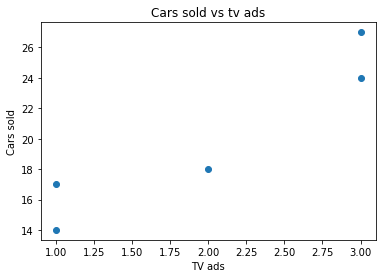

In [8]:
x = df['TV Ads'].values
y = df['car Sold'].values
plt.plot(x,y,'o')
plt.xlabel('TV ads')
plt.ylabel('Cars sold')
plt.title('Cars sold vs tv ads')
plt.show()

In [12]:
x = sm.add_constant(x)
linear_model = sm.OLS(y,x)
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 25 May 2021   Prob (F-statistic):             0.0190
Time:                        22:39:13   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [16]:
path = 'lrm.xlsx'
df = pd.read_excel(path,engine = 'openpyxl')
df.head()

,Restaurant,Student_Population,Sales
0,1,2,58
1,2,6,105
2,3,8,88
3,4,8,118
4,5,12,117


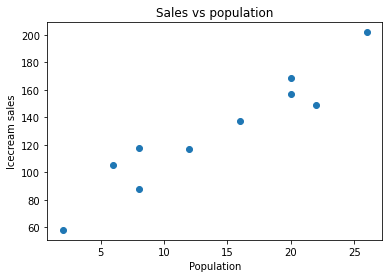

In [17]:
x = df['Student_Population'].values
y = df['Sales'].values
plt.plot(x,y,'o')
plt.xlabel('Population')
plt.ylabel('Icecream sales')
plt.title('Sales vs population')
plt.show()

In [18]:
x = sm.add_constant(x)
linear_model = sm.OLS(y,x)
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 25 May 2021   Prob (F-statistic):           2.55e-05
Time:                        22:46:05   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0000      9.226      6.503      0.0

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


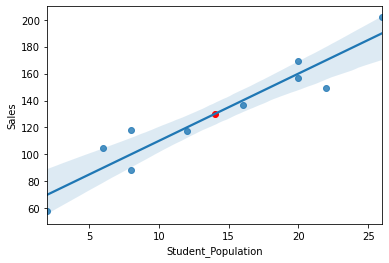

In [22]:
x = df['Student_Population']
y = df['Sales']
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color='red')

In [26]:
from statsmodels.stats.outliers_influence import summary_table
s1, data, s2 = summary_table(result,alpha = 0.05)
y_pred = data[:,2]
confidence_int_low,confidence_int_high = data[:,4:6].T
pred_int_low,pred_int_high = data[:,6:8].T

In [27]:
print(confidence_int_low)

[ 51.03868339  75.2931351   87.10977127  87.10977127 109.56629808
 129.56629808 147.10977127 147.10977127 155.2931351  171.03868339]


In [28]:
print(confidence_int_high)

[ 88.96131661 104.7068649  112.89022873 112.89022873 130.43370192
 150.43370192 172.89022873 172.89022873 184.7068649  208.96131661]


In [29]:
print(pred_int_low)

[ 32.89834155  54.8817226   65.60291394  65.60291394  86.446108
 106.446108   125.60291394 125.60291394 134.8817226  152.89834155]


In [30]:
print(pred_int_high)

[107.10165845 125.1182774  134.39708606 134.39708606 153.553892
 173.553892   194.39708606 194.39708606 205.1182774  227.10165845]


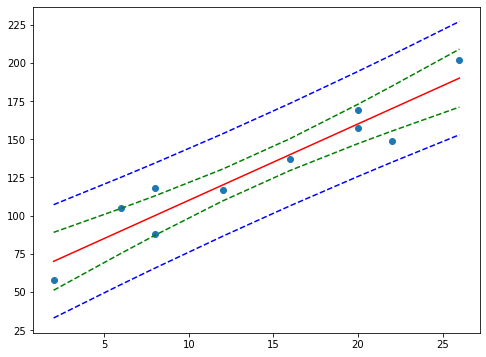

In [32]:
fig,ax = plt.subplots(figsize = (8,6))
ax.plot(x,y,'o',label = 'data')
ax.plot(x,y_pred,'r-',label = 'OLS')
ax.plot(x,confidence_int_low,'g--')
ax.plot(x,confidence_int_high,'g--')
ax.plot(x,pred_int_low,'b--')
ax.plot(x,pred_int_high,'b--')
plt.show()